 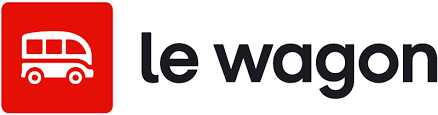


#  OpenWeatherMap API 🌦️

In this challenge, we will use OpenWeatherMap API to retrieve extract temperature forecasts for any city around the globe 🌡️


## Read the documentation


When presented with a new API to use, your first reflex should be to go straight to the documentation, and figure out the following:

- Does it output JSON?
- Does this API require authentication? (do I need to sign up to get an API key? Do I need to pay?)
- Which endpoints can I call? What data does it return?



(Go back to the `API 101` lecture from week 3 if you are confused about some of the above terms)


👯‍♂️ Buddy time! Go to [OpenWeatherMap API documentation](https://openweathermap.org/api) read it, and try answering those questions. When you are comfortable with what this API is about, you can start working on the challenge.



## Authentication (and a small 🎁 from us)


You might have noticed that OpenWeatherMap requires you to sign up for an API key. Even though OpenWeatherMap offers a [few free API calls](https://openweathermap.org/price), they still want to know how different users consume the API (and track if you hit your API call limit 😜). This is the norm for most APIs out there.


You can either:

- Sign up for an API key (which might take 10-20 minutes to get activated)
- Use a proxy we created for you 👉 https://weather.lewagon.com/. This URL already includes the API key, so you can just replace the host of OpenWeatherMap with the Le Wagon website and skip the API key parameter in your request. For example:

`https://api.openweathermap.org/geo/1.0/direct?q=Barcelona&appid=XXXXXXXXXXX`

becomes:

`https://weather.lewagon.com/geo/1.0/direct?q=Barcelona`

**Note**: make sure to check https://weather.lewagon.com/ to see the documentation on which endpoints are proxied (if you get a Forbidden error copy and paste the link in a new tab!). Try to click on one of the examples displayed to make sure that you can run API calls succesfully.


If the endpoint you want to access is not shown, you will need to access it with your own API key instead.


## Make some API calls

### With the browser



Have a look at the following link.

<code>https://weather.lewagon.com/geo/1.0/direct?q=Paris</code>

Is it a little hard to read ? If you are using Google Chrome, we recommend you to install the [JSONVue extension](https://chromewebstore.google.com/detail/jsonvue/chklaanhfefbnpoihckbnefhakgolnmc), it will make reading JSON on your browser much easier.
Once installed, reload the page, and admire the difference !



### With Python


Now it's your turn to code ! \
Use the `requests`library and load the data for the city of Paris in a variable called `paris_info`and print it. \
This should look exactly the same as in your browser.


<details>
    <summary>Hint 🔍</summary>

Do not copy the whole URL provided above, try to use `params` argument of the `requests.get()`method instead.
    
</details>

In [1]:
import requests
import json

# load my api key 
with open('api_key.json', 'r') as f:
    content = json.load(f)

api_key = content['api_key']
url = 'https://api.openweathermap.org/data/2.5/weather'

params = {
    'q' : 'paris',
    'appid' : api_key
}

paris_info = requests.get(url, params=params).json()

paris_info

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 286.36,
  'feels_like': 285.93,
  'temp_min': 285.96,
  'temp_max': 287.03,
  'pressure': 1024,
  'humidity': 84,
  'sea_level': 1024,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 70},
 'clouds': {'all': 20},
 'dt': 1760693369,
 'sys': {'type': 2,
  'id': 2012208,
  'country': 'FR',
  'sunrise': 1760681630,
  'sunset': 1760720263},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

What is the type of `paris_info`?

🎉 Congratulations, you just made your first API call with Python!


### Retrieve specific information

Using your `paris_info`variable, retrieve the latitude and longitude of Paris and store them in a list named `paris_coordinates`


In [2]:
paris_coordinates = paris_info['coord']
paris_coordinates

{'lon': 2.3488, 'lat': 48.8534}

Finally, create a `get_coordinates`function that will take a city name as argument and return its coordinates in a list.

In [3]:
def get_coordinates(city, api_key):
    url = 'https://api.openweathermap.org/data/2.5/weather'

    params = {
        'q' : city,
        'appid' : api_key
    }

    city_info = requests.get(url, params=params).json()

    coordinates_list = [value for value in city_info['coord'].values()]

    return coordinates_list

In [4]:
paris_coordinates = get_coordinates('paris', api_key)
paris_coordinates

[2.3488, 48.8534]

## Weather Forecasts


### Paris forecasts


Go back to the documentation, and find an endpoint you can use to get weather forecasts data.



<details>
    <summary>Hint 🔍</summary>

The proxy provided by Le Wagon has a `forecast` endpoint.

</details>


What are the `query parameters` we need to get that information? \
Using that endpoint, store the weather forecasts of Paris in a variable named `paris_forecasts`.

<details>
    <summary>Hint 🔍</summary>

You can re-use your `get_coordinates` function.

</details>


In [5]:

url = 'https://api.openweathermap.org/data/2.5/forecast'

params = {
    'q' : 'paris',
    'cnt': 40,
    'appid' : api_key
}

paris_forecast = requests.get(url, params=params).json()

paris_forecast

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1760702400,
   'main': {'temp': 287.23,
    'feels_like': 286.6,
    'temp_min': 287.23,
    'temp_max': 288.42,
    'pressure': 1024,
    'sea_level': 1024,
    'grnd_level': 1013,
    'humidity': 73,
    'temp_kf': -1.19},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03d'}],
   'clouds': {'all': 28},
   'wind': {'speed': 3.92, 'deg': 67, 'gust': 5.73},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2025-10-17 12:00:00'},
  {'dt': 1760713200,
   'main': {'temp': 289.45,
    'feels_like': 288.52,
    'temp_min': 289.45,
    'temp_max': 290.86,
    'pressure': 1023,
    'sea_level': 1023,
    'grnd_level': 1012,
    'humidity': 53,
    'temp_kf': -1.41},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 7},
   'wind': {'speed': 3.75, 'deg': 66, 'gust': 5.2},
   'visibil

Starting from your `paris_forecasts` variable and using a for loop, create 2 variables named `times` and `maxs` that will respectively store the forecast datetimes and maximum temperatures of Paris.


In [6]:
times = [time['dt_txt'] for time in paris_forecast['list']]
maxs = [maxi['main']['temp_max'] for maxi in paris_forecast['list']]

Finally, store your 2 lists in a `paris_dict` dictionary, assigning them to 2 keys: `datetime` and `max_temperature`



In [7]:
paris_dict = {
    'datetime': times,
    'max_temperature': maxs
}

paris_dict

{'datetime': ['2025-10-17 12:00:00',
  '2025-10-17 15:00:00',
  '2025-10-17 18:00:00',
  '2025-10-17 21:00:00',
  '2025-10-18 00:00:00',
  '2025-10-18 03:00:00',
  '2025-10-18 06:00:00',
  '2025-10-18 09:00:00',
  '2025-10-18 12:00:00',
  '2025-10-18 15:00:00',
  '2025-10-18 18:00:00',
  '2025-10-18 21:00:00',
  '2025-10-19 00:00:00',
  '2025-10-19 03:00:00',
  '2025-10-19 06:00:00',
  '2025-10-19 09:00:00',
  '2025-10-19 12:00:00',
  '2025-10-19 15:00:00',
  '2025-10-19 18:00:00',
  '2025-10-19 21:00:00',
  '2025-10-20 00:00:00',
  '2025-10-20 03:00:00',
  '2025-10-20 06:00:00',
  '2025-10-20 09:00:00',
  '2025-10-20 12:00:00',
  '2025-10-20 15:00:00',
  '2025-10-20 18:00:00',
  '2025-10-20 21:00:00',
  '2025-10-21 00:00:00',
  '2025-10-21 03:00:00',
  '2025-10-21 06:00:00',
  '2025-10-21 09:00:00',
  '2025-10-21 12:00:00',
  '2025-10-21 15:00:00',
  '2025-10-21 18:00:00',
  '2025-10-21 21:00:00',
  '2025-10-22 00:00:00',
  '2025-10-22 03:00:00',
  '2025-10-22 06:00:00',
  '2025-10-22

### Any city forecasts

Using every previous step, create a `get_forecasts` function that will take a city name as argument and return a dictionnary containing the forecast datetimes and maximum temperatures. 🚀

In [8]:
def get_forecast(city, api_key):

    url = 'https://api.openweathermap.org/data/2.5/forecast'

    params = {
        'q' : city,
        'cnt': 40,
        'appid' : api_key
    }

    city_forecast = requests.get(url, params=params).json()

    times = [time['dt_txt'] for time in city_forecast['list']]
    maxs = [maxi['main']['temp_max'] for maxi in city_forecast['list']]

    city_dict = {
        'datetime': times,
        'max_temperature': maxs
    }

    return city_dict  

In [9]:
paris_dict = get_forecast('paris', api_key)
paris_dict

{'datetime': ['2025-10-17 12:00:00',
  '2025-10-17 15:00:00',
  '2025-10-17 18:00:00',
  '2025-10-17 21:00:00',
  '2025-10-18 00:00:00',
  '2025-10-18 03:00:00',
  '2025-10-18 06:00:00',
  '2025-10-18 09:00:00',
  '2025-10-18 12:00:00',
  '2025-10-18 15:00:00',
  '2025-10-18 18:00:00',
  '2025-10-18 21:00:00',
  '2025-10-19 00:00:00',
  '2025-10-19 03:00:00',
  '2025-10-19 06:00:00',
  '2025-10-19 09:00:00',
  '2025-10-19 12:00:00',
  '2025-10-19 15:00:00',
  '2025-10-19 18:00:00',
  '2025-10-19 21:00:00',
  '2025-10-20 00:00:00',
  '2025-10-20 03:00:00',
  '2025-10-20 06:00:00',
  '2025-10-20 09:00:00',
  '2025-10-20 12:00:00',
  '2025-10-20 15:00:00',
  '2025-10-20 18:00:00',
  '2025-10-20 21:00:00',
  '2025-10-21 00:00:00',
  '2025-10-21 03:00:00',
  '2025-10-21 06:00:00',
  '2025-10-21 09:00:00',
  '2025-10-21 12:00:00',
  '2025-10-21 15:00:00',
  '2025-10-21 18:00:00',
  '2025-10-21 21:00:00',
  '2025-10-22 00:00:00',
  '2025-10-22 03:00:00',
  '2025-10-22 06:00:00',
  '2025-10-22

Congratulations ! 🎉 \
You have now created a powerful function that can give you hourly temperature forecasts thanks to some API calls !

### Bonus : Visualization

Run the following lines of code to plot the temperature forecasts for various cities accross the globe 🌍 \
Don't worry about about the `plotly.express` library, we will cover it in the next lecture.

In [12]:
import pandas as pd
import plotly.express as px

cities = ["Paris","London","Lisbon","New York","Cape Town", "Madrid"] # Feel free to add or remove some cities

df=pd.DataFrame()

for city in cities:


    city_df=pd.DataFrame(get_forecast(city, api_key))
    city_df['datetime']=pd.to_datetime(city_df['datetime'])
    city_df.set_index('datetime',inplace=True)
    city_df.columns=[city]
    df=pd.concat([df,city_df],axis=1)


px.line(df)
